## GMM 클러스터링 기법을 이용한 분류 작업 해보기
---
데이터를 분석하는 방법 중에서 클러스터링(clustering, 군집화)이라는 방법이 있습니다. 클러스터링은 임의의 집단이 있을 때, 이 집단의 구성원을 부분집단으로 나누어주는 알고리즘이죠. 이중에서 간단하게 구현할 수 있는 GMM 클러스터링에 대해 알아보고, 이를 파이썬(Python) 코드로 구현해 보겠습니다.  
</p></br></br>


GMM은 Gausian Mixture Model의 약자입니다. 특정한 집단이 있을 때, 각각의 부분집단의 데이터가 가우시안 분포(정규분포라고도 하지요)를 따른다는 가정 하에 이루어지는 분석 모델인데요, 이에 따르면 다양한 부분집단이 모여서 하나의 큰 집단을 이루게 된다면 각각의 데이터는 원래 어떤 부분집단에 들어가 있는지를 추정할 수 있다는 논리입니다.  
</p></br></br>


<center><img src="./figure/gmm_01.png"></center>  
</p></br></br>


만약에 위와 같은 두 분포에 해당하는 데이터가 있다고 합시다. 그러면, 현재 데이터의 값에 따라 어떤 부분집단에 들어가는지를 유추할 수 있습니다. x 좌표의 값을 기준으로 보자면, 주황색 그래프의 분포와는 동떨어진 값이기 때문에 자연스래 파란색 분포에 해당한다고 볼 수 있고, y의 경우에는 그 반대로 해석할 수 있겠지요.  
</p></br></br>


이런 논리로 그룹을 분류하는 방법이 GMM 클러스터링 기법입니다. 그러면 이번에는 샘플 데이터를 이용해서 GMM 클러스터링을 해보도록 하겠습니다. 아이리스 데이터를 불러온 뒤 아래 코드를 이용해 그룹을 나눠봅시다.  
</p></br></br>



In [1]:
# 패키지 및 데이터 불러오기
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
iris = sns.load_dataset('iris')

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


</p></br></br>


iris 데이터는 파이썬의 씨본(seaborn) 패키지에서 샘플을 제공하기 때문에 이를 이용해 불러왔습니다. 데이터를 살펴보면, 4가지 feature와 species 정보로 이루어져 있습니다. 여기서 데이터 분석의 편의를 위해, feature 개수를 2개로 줄여보도록 합시다. PCA 차원축소 기법을 이용해서 2차원 데이터로 변환하도록 하겠습니다.  
</p></br></br>



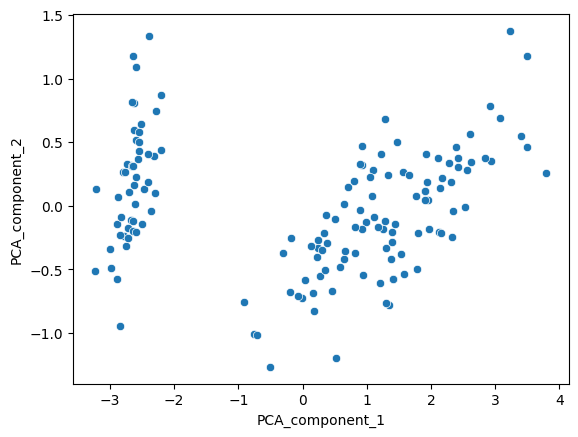

In [3]:
# PCA 차원축소
iris_pca = pca.fit_transform(iris.iloc[:,:-1])
iris_pca_df = pd.DataFrame(iris_pca, columns=['PCA_component_1','PCA_component_2'])

# 시각화
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2')
plt.show()

</p></br></br>


이제, 이 데이터를 이용해서 GMM 클러스터링을 해 보도록 하겠습니다. 저는 과연 클러스터링을 통해 species 정보를 구분할 수 있을지 궁금하니 3개 그룹으로 나누어 보는 과정을 거치고, sepcies 정보와 비교해 보도록 하겠습니다.  
</p></br></br>



C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


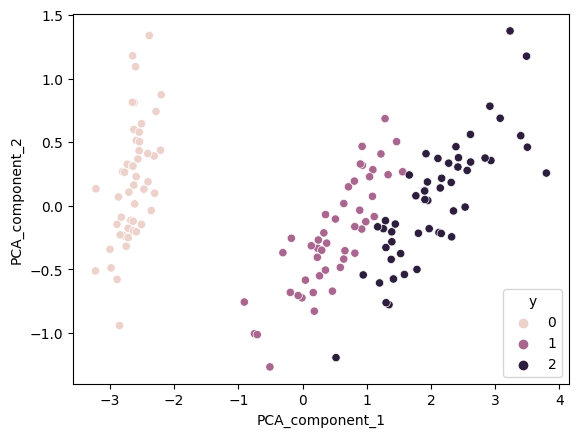

In [4]:
# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=12345)
gmm_y = gmm.fit_predict(iris_pca_df)

# GMM 클러스터링 결과 시각화
iris_pca_df['y'] = gmm_y
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='y')
plt.show()

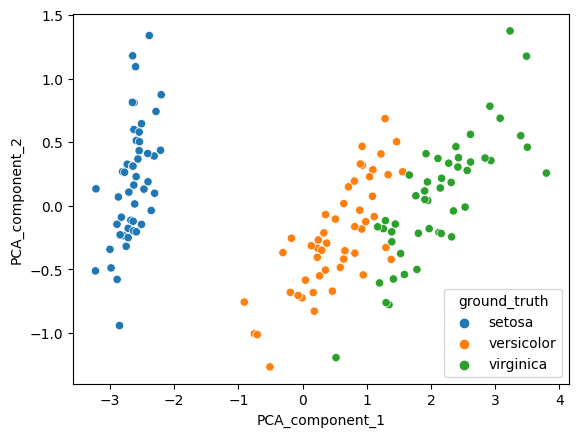

In [5]:
# species 정보 시각화
iris_pca_df['ground_truth'] = iris['species']
sns.scatterplot(data=iris_pca_df, x='PCA_component_1', y='PCA_component_2', hue='ground_truth')
plt.show()

</p></br></br>


시각화 결과를 비교해 보니, 각 종별로 다른 색깔(그룹)이 배정된 것을 확인할 수 있습니다. GMM 클러스터링 알고리즘을 이용해서 iris의 species를 구분하는 것은 효과적이라는 결론을 얻을 수 있겠네요.